In [41]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Reading the historical_data
df=pd.read_csv("Historical_data.csv")
#Reading the processed historical_data
data=pd.read_csv("Historical_data 01.csv")
#Reading the new_customer_data
new_data=pd.read_csv("new_customer_wow.csv")
#Getting dummy values for columns with categorical data for historical_data
data=pd.get_dummies(data,columns=['job_type','marital','education','communication_type',
                                  'month','prev_campaign_outcome'])
#Getting dummy values for columns with categorical data for new_customer_data
new_data=pd.get_dummies(new_data,columns=['job_type','marital','education','communication_type',
                                          'month','prev_campaign_outcome'])
#Dropping the unnessecary columns from historical_data
data = data.drop(['month_dec','prev_campaign_outcome_unknown','communication_type_unknown',
                  'marital_divorced','job_type_unknown','education_unknown'],axis='columns')
#Dropping the unnessecary columns from new_customer_data
new_data = new_data.drop(['month_dec','prev_campaign_outcome_unknown','communication_type_unknown',
                          'marital_divorced','job_type_unknown','education_unknown'],axis='columns')

In [42]:
#Basic description of historical_data
df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
count,23403.000000,23603.000000,23880.000000,23880.000000,23784.000000,23880.000000,23880.000000
mean,40.394821,1363.966106,15.796315,854.879648,2.775353,0.583836,0.106198
std,10.753045,3019.583085,8.321136,74.537616,3.148117,2.624465,0.308097
min,18.000000,-8020.000000,1.000000,661.000000,1.000000,0.000000,0.000000
25%,32.000000,71.000000,8.000000,809.000000,1.000000,0.000000,0.000000
50%,38.000000,443.000000,16.000000,871.000000,2.000000,0.000000,0.000000
75%,48.000000,1410.500000,21.000000,897.000000,3.000000,0.000000,0.000000
max,93.000000,98419.000000,31.000000,1019.000000,63.000000,275.000000,1.000000


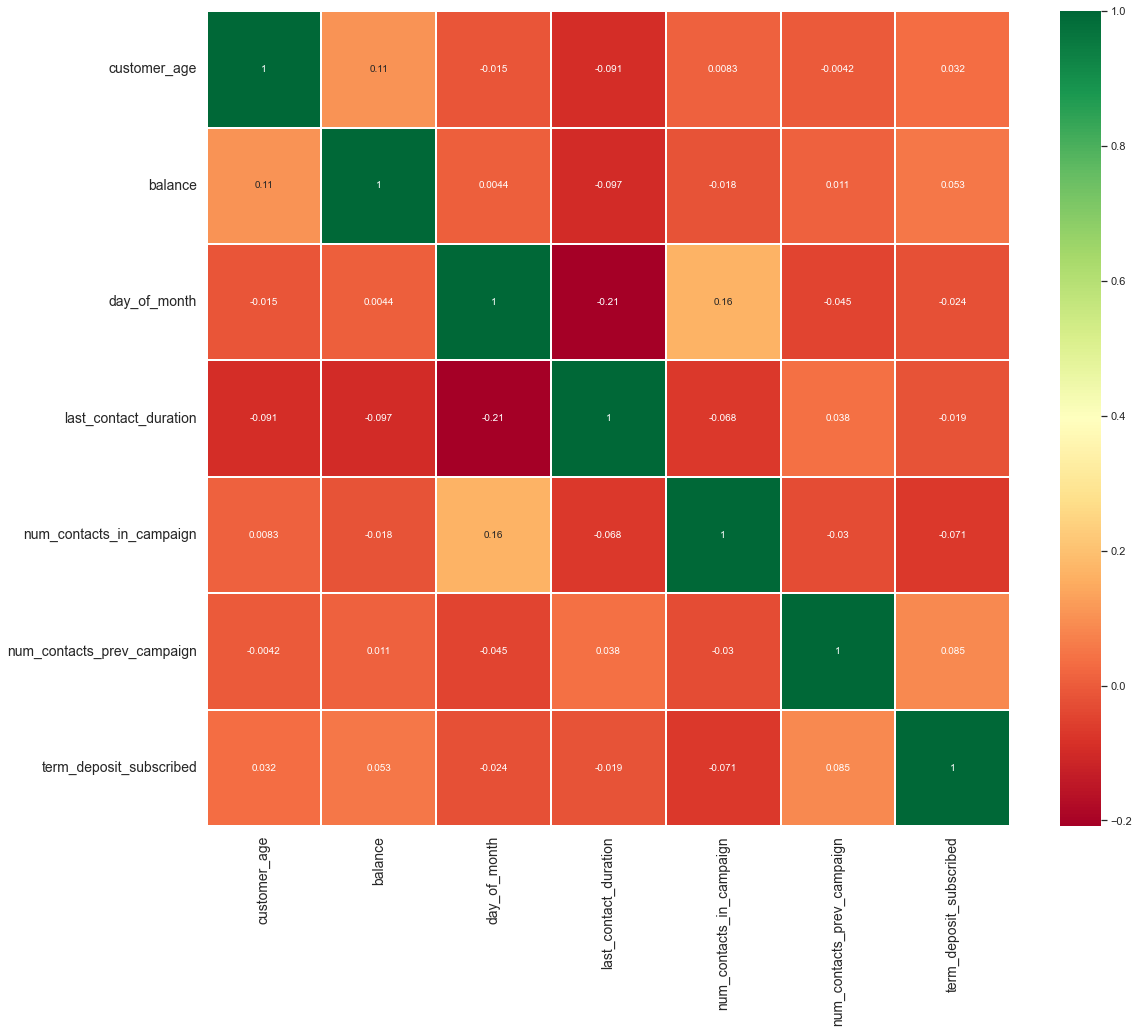

In [43]:
#correlation matrix of numeric variables
from sklearn.preprocessing import StandardScaler
import seaborn as sns
corr = df.corr()

sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [44]:
#Grouping balance in categories
df['balance_categories'] = np.nan

lst = [df]

for column in lst:
    column.loc[column['balance'] <= 0, 'balance_categories'] = 'no balance'
    column.loc[(column['balance'] > 0) & (column['balance'] <= 1000), 'balance_categories'] = 'low balance'
    column.loc[(column['balance'] > 1000) & (column['balance'] <= 5000), 'balance_categories'] = 'average balance'
    column.loc[column['balance'] > 5000, 'balance_categories'] = 'high balance'
    
df.head()
df['balance_categories'].value_counts()
#We find most of the customers belong in low balance category

low balance        12861
average balance     6066
no balance          3172
high balance        1504
Name: balance_categories, dtype: int64

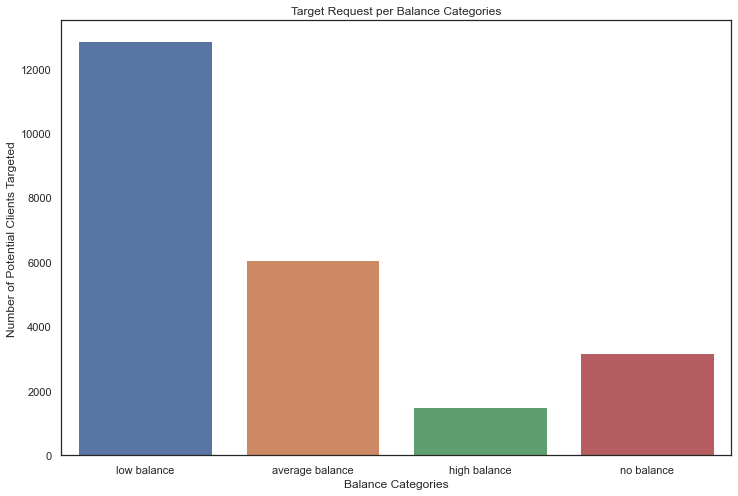

In [45]:
#Plotting the balance categories along number of customers in each category
fig, ax = plt.subplots(figsize=(12,8))
g = sns.countplot(x="balance_categories", data=df)

plt.title("Target Request per Balance Categories")
plt.xlabel('Balance Categories')
plt.ylabel("Number of Potential Clients Targeted")

plt.show()

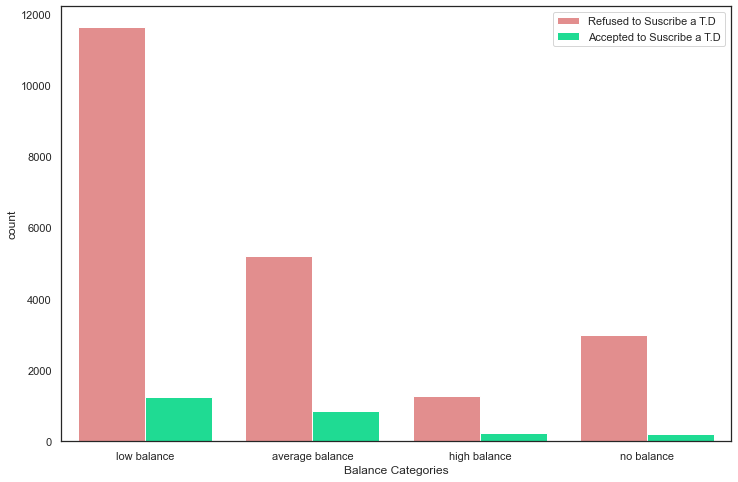

In [46]:
#plotting balance categories to see difference realtion between people subscribing and people not subscribing
fig, ax = plt.subplots(figsize=(12,8))
g = sns.countplot(x="balance_categories", data=df, hue='term_deposit_subscribed', palette={0:'#F08080', 1:'#00FA9A'})

legend_name = plt.legend()
legend_name.get_texts()[0].set_text('Refused to Suscribe a T.D')
legend_name.get_texts()[1].set_text('Accepted to Suscribe a T.D')
plt.xlabel('Balance Categories')


plt.show()
#The graph shows that average and high balance category are more likely to open a term deposit account

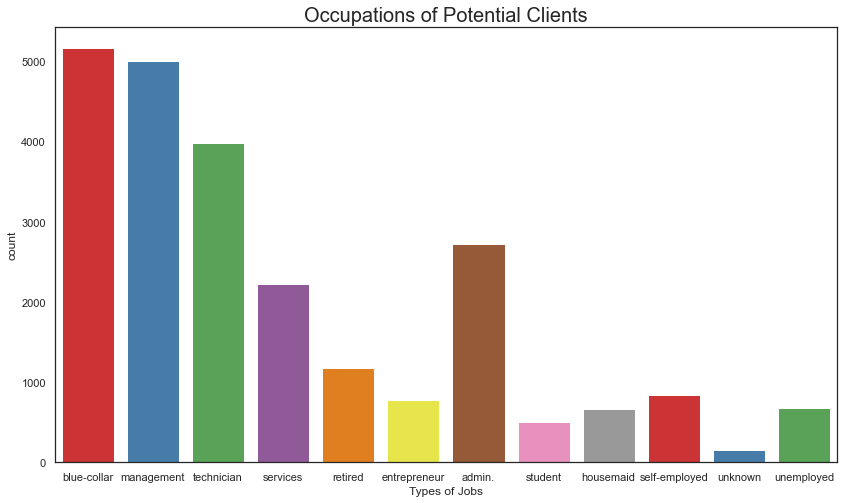

In [47]:
#plotting different job types in historical_data
sns.set(style="white")
fig, ax = plt.subplots(figsize=(14,8))
sns.countplot(x="job_type", data=df, palette="Set1")
ax.set_title("Occupations of Potential Clients", fontsize=20)
ax.set_xlabel("Types of Jobs")
plt.show()

In [48]:
#Setting the value for X and Y to train the model
x=data[['customer_age', 'default', 'balance', 'housing_loan',
       'personal_loan', 'last_contact_duration', 'day_of_month',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'job_type_admin.', 'job_type_blue-collar', 'job_type_entrepreneur',
       'job_type_housemaid', 'job_type_management', 'job_type_retired',
       'job_type_self-employed', 'job_type_services', 'job_type_student',
       'job_type_technician', 'job_type_unemployed', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'communication_type_cellular',
       'communication_type_telephone', 'month_apr', 'month_aug', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'prev_campaign_outcome_failure',
       'prev_campaign_outcome_other', 'prev_campaign_outcome_success']]
y=data['term_deposit_subscribed']

In [49]:
#Fitting the Random Forest Regression model with help of historical_data
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100,random_state = 0)
regressor.fit(x,y)
y_pred= regressor.predict(x)
#Finding R2 Score of the regression model
R2_score=regressor.score(x,y)
print('R2 Score:', R2_score)

R2 Score: 0.8844552588169639


In [50]:
#calculating error values in prediction model
from sklearn.metrics import accuracy_score
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y, y_pred)
meanSqErr = metrics.mean_squared_error(y, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y, y_pred))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.05724302620456467
Mean Square Error: 0.010972717666948437
Root Mean Square Error: 0.10475074065107338


In [51]:
#Finding importance of each data type using Gini importance
importances = regressor.feature_importances_

print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 30 (0.000589)
2. feature 35 (0.002478)
3. feature 1 (0.003041)
4. feature 26 (0.003360)
5. feature 12 (0.003635)
6. feature 29 (0.003837)
7. feature 28 (0.004503)
8. feature 14 (0.004709)
9. feature 31 (0.004859)
10. feature 39 (0.005033)
11. feature 17 (0.005526)
12. feature 34 (0.005564)
13. feature 19 (0.005675)
14. feature 11 (0.005814)
15. feature 38 (0.006585)
16. feature 15 (0.007198)
17. feature 27 (0.008130)
18. feature 25 (0.009469)
19. feature 37 (0.009679)
20. feature 22 (0.009884)
21. feature 16 (0.009938)
22. feature 36 (0.010270)
23. feature 4 (0.010670)
24. feature 21 (0.011446)
25. feature 10 (0.011548)
26. feature 9 (0.012107)
27. feature 32 (0.012423)
28. feature 24 (0.012662)
29. feature 13 (0.012892)
30. feature 23 (0.013773)
31. feature 20 (0.013775)
32. feature 18 (0.013964)
33. feature 33 (0.014855)
34. feature 3 (0.018763)
35. feature 8 (0.030454)
36. feature 7 (0.053076)
37. feature 6 (0.079099)
38. feature 5 (0.101328)
39. feature 

In [52]:
#Extracting customer_id from new_customer_data
customer_id=new_data['customer_id']
#Setting dataset for prediction from new_customer_data
x_new=new_data[['customer_age', 'default', 'balance', 'housing_loan',
       'personal_loan', 'last_contact_duration', 'day_of_month',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'job_type_admin.', 'job_type_blue-collar', 'job_type_entrepreneur',
       'job_type_housemaid', 'job_type_management', 'job_type_retired',
       'job_type_self-employed', 'job_type_services', 'job_type_student',
       'job_type_technician', 'job_type_unemployed', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'communication_type_cellular',
       'communication_type_telephone', 'month_apr', 'month_aug', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'prev_campaign_outcome_failure',
       'prev_campaign_outcome_other', 'prev_campaign_outcome_success']]

In [53]:
#predicting regression values
prediction=regressor.predict(x_new)
#Concatenating customer_id and prediction value
out=pd.DataFrame({'customer_id':customer_id,'forest value':prediction})
#Exporting data to xlsx file
out.to_excel('Prediction.xlsx')